In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df["X1"] = [1,2,3,4,5,6,6,7,9,9]
df["X2"] = [5,3,6,8,1,9,5,8,9,2]
df["label"] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

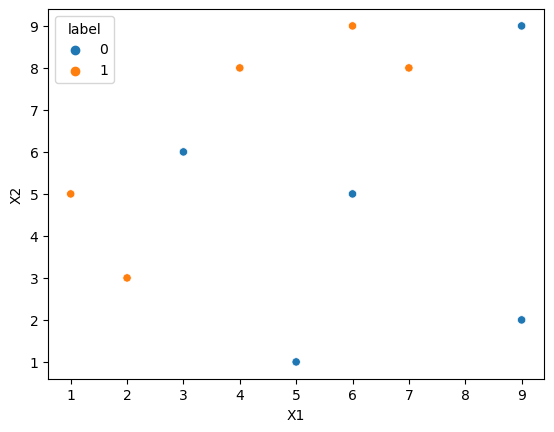

In [5]:
import seaborn as sns
sns.scatterplot(x = df["X1"],y = df["X2"], hue = df["label"])


In [6]:
#Step 1 - We assign same weights to each row
## wt = 1/no. of rows

In [7]:
df["weights"] = 1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
# Step 2 - We will create Decision Tree classifier with depth = 1

In [10]:
from sklearn.tree import DecisionTreeClassifier 

In [11]:
dt1 = DecisionTreeClassifier(max_depth = 1)

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [13]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

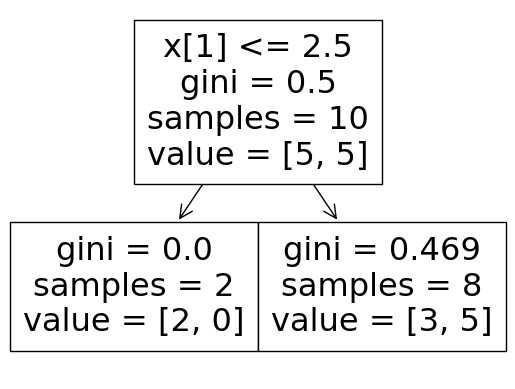

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

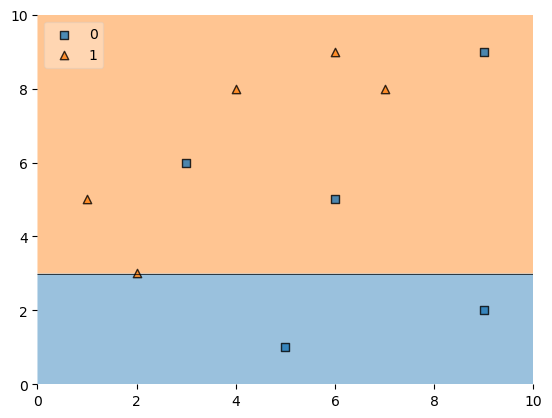

In [15]:
# How many misclassified are there
plot_decision_regions(X,y,clf = dt1, legend=2)

In [16]:
df["y_pred"] = dt1.predict(X)

In [17]:
df
# in total we have 3 misclassified by the model

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [18]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))
#if error is 0 then above code will give an error. So we can add very very small value 0.00001

In [19]:
# Step 3 Calculate model weight
# total error = sum of weights of misclassifiers
alpha1 = calculate_model_weight(0.3)
alpha1
# alpha will be high for a more accurate model

0.42364893019360184

In [23]:
# Step 4 - UPdate Weights
def update_row_weights(row, alpha = 0.423):
    if row["label"] == row["y_pred"]:
        return row["weights"]*np.exp(-alpha)
    else:
        return row["weights"]*np.exp(alpha)
# higher the alpha more the value of exp(alpha)
#https://www.desmos.com/calculator

In [21]:
df["updated_weights"] = df.apply(update_row_weights, axis = 1)

In [22]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [25]:
# sum of updated weights
df["updated_weights"].sum()
# we have to normalise the updated_weights to have sum = 1

0.9165153319682015

In [26]:
df["normalised_weights"] = df["updated_weights"]/df["updated_weights"].sum()

In [27]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [28]:
df["normalised_weights"].sum()

1.0

In [29]:
df["cumsum_upper"] = np.cumsum(df["normalised_weights"])
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [30]:
df["cumsum_lower"] = df["cumsum_upper"] - df["normalised_weights"]

In [31]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [32]:
df.columns

Index(['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
       'normalised_weights', 'cumsum_upper', 'cumsum_lower'],
      dtype='object')

In [33]:
df_new = df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
        'cumsum_lower','cumsum_upper' ]]

In [34]:
df_new

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [37]:
np.random.random()

0.28675960781068877

In [40]:
def create_new_dataset(df):
    
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row["cumsum_upper"] > a and a > row["cumsum_lower"]:
                indices.append(index)
                
    return indices
        

In [41]:
index_values = create_new_dataset(df)
index_values

[2, 4, 8, 6, 7, 9, 4, 3, 6, 8]

In [42]:
second_df = df.iloc[index_values,[0,1,2,3]]
# above indices & only 1st four columns 0,1,2,3

In [43]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1


In [44]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [45]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [46]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]')]

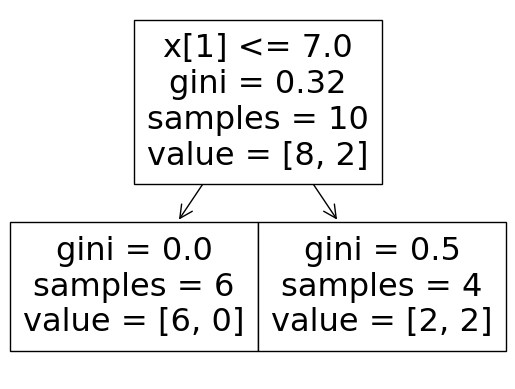

In [48]:
from sklearn.tree import plot_tree
plot_tree(dt2)

<Axes: >

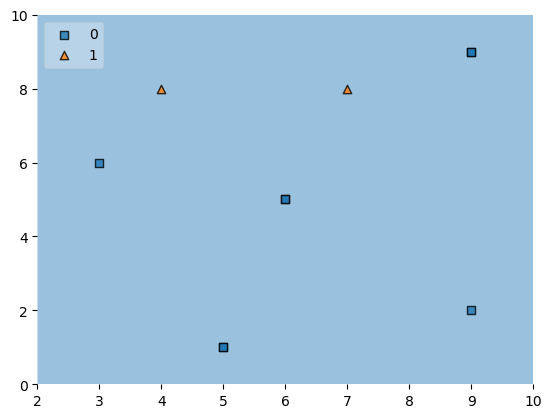

In [49]:
# How many misclassified are there
plot_decision_regions(X,y,clf = dt2, legend=2)

In [50]:
second_df["y_pred"] = dt2.predict(X)

In [51]:
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
9,9,2,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0


In [52]:
alpha2 = calculate_model_weight(0.2)

In [53]:
alpha2

0.6931471805599453

In [54]:
# Step 4 - UPdate Weights
def update_row_weights(row, alpha = 0.693):
    if row["label"] == row["y_pred"]:
        return row["weights"]*np.exp(-alpha)
    else:
        return row["weights"]*np.exp(alpha)
# higher the alpha more the value of exp(alpha)
#https://www.desmos.com/calculator

In [55]:
second_df["updated_weights"] = second_df.apply(update_row_weights, axis = 1)

In [56]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.050007
4,5,1,0,0.1,0,0.050007
8,9,9,0,0.1,0,0.050007
6,6,5,0,0.1,0,0.050007
7,7,8,1,0.1,0,0.199971
9,9,2,0,0.1,0,0.050007
4,5,1,0,0.1,0,0.050007
3,4,8,1,0.1,0,0.199971
6,6,5,0,0.1,0,0.050007
8,9,9,0,0.1,0,0.050007


In [57]:
second_df["normalised_weights"] = second_df["updated_weights"]/second_df["updated_weights"].sum()

In [58]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
2,3,6,0,0.1,0,0.050007,0.062509
4,5,1,0,0.1,0,0.050007,0.062509
8,9,9,0,0.1,0,0.050007,0.062509
6,6,5,0,0.1,0,0.050007,0.062509
7,7,8,1,0.1,0,0.199971,0.249963
9,9,2,0,0.1,0,0.050007,0.062509
4,5,1,0,0.1,0,0.050007,0.062509
3,4,8,1,0.1,0,0.199971,0.249963
6,6,5,0,0.1,0,0.050007,0.062509
8,9,9,0,0.1,0,0.050007,0.062509


In [59]:
second_df["cumsum_upper"] = np.cumsum(second_df["normalised_weights"])
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,cumsum_upper
2,3,6,0,0.1,0,0.050007,0.062509,0.062509
4,5,1,0,0.1,0,0.050007,0.062509,0.125018
8,9,9,0,0.1,0,0.050007,0.062509,0.187528
6,6,5,0,0.1,0,0.050007,0.062509,0.250037
7,7,8,1,0.1,0,0.199971,0.249963,0.500000
9,9,2,0,0.1,0,0.050007,0.062509,0.562509
4,5,1,0,0.1,0,0.050007,0.062509,0.625018
3,4,8,1,0.1,0,0.199971,0.249963,0.874982
6,6,5,0,0.1,0,0.050007,0.062509,0.937491
8,9,9,0,0.1,0,0.050007,0.062509,1.000000


In [60]:
second_df["cumsum_lower"] = second_df["cumsum_upper"] - second_df["normalised_weights"]

In [61]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,cumsum_upper,cumsum_lower
2,3,6,0,0.1,0,0.050007,0.062509,0.062509,0.000000
4,5,1,0,0.1,0,0.050007,0.062509,0.125018,0.062509
8,9,9,0,0.1,0,0.050007,0.062509,0.187528,0.125018
6,6,5,0,0.1,0,0.050007,0.062509,0.250037,0.187528
7,7,8,1,0.1,0,0.199971,0.249963,0.500000,0.250037
9,9,2,0,0.1,0,0.050007,0.062509,0.562509,0.500000
4,5,1,0,0.1,0,0.050007,0.062509,0.625018,0.562509
3,4,8,1,0.1,0,0.199971,0.249963,0.874982,0.625018
6,6,5,0,0.1,0,0.050007,0.062509,0.937491,0.874982
8,9,9,0,0.1,0,0.050007,0.062509,1.000000,0.937491


In [62]:
second_df_new = df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
        'cumsum_lower','cumsum_upper' ]]

In [63]:
index_values = create_new_dataset(second_df)
index_values

[7, 4, 3, 7, 9, 6, 9, 9, 7, 6]

In [64]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [65]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
7,7,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [66]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [67]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [68]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]')]

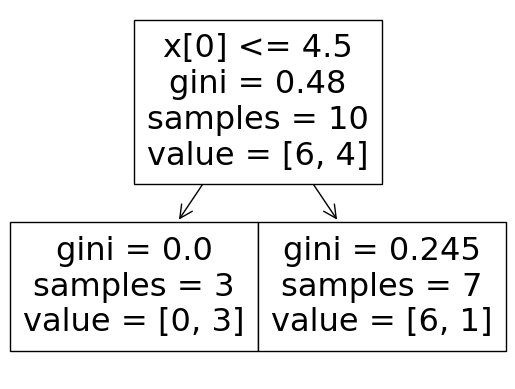

In [69]:
from sklearn.tree import plot_tree
plot_tree(dt3)

<Axes: >

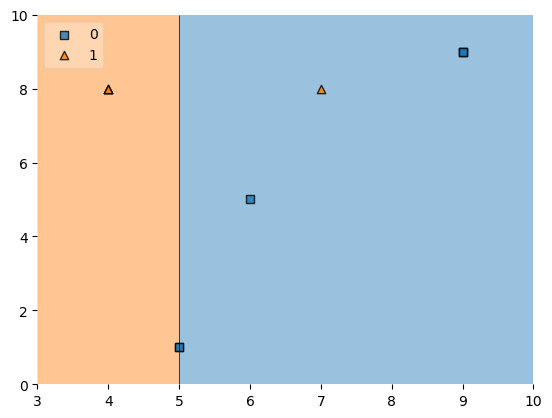

In [70]:
# How many misclassified are there
plot_decision_regions(X,y,clf = dt3, legend=2)

In [71]:
third_df["y_pred"] = dt3.predict(X)

In [72]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
7,7,8,1,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1
4,5,1,0,0.1,0


In [73]:
alpha3 = calculate_model_weight(0.1)
alpha3

1.0986122886681098

In [75]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 0.6931471805599453 1.0986122886681098


In [76]:
# Prediciton
## remember - in boosting 0 is considered -1 

In [77]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [78]:
dt2.predict(query)

array([0], dtype=int64)

In [79]:
dt3.predict(query)

array([1], dtype=int64)

In [80]:
alpha1*(+1)+alpha2*(-1)+alpha3*(+1)

0.8291140383017663

In [81]:
np.sign(0.82911)

1.0

In [82]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query),dt2.predict(query),dt3.predict(query)

(array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))

In [85]:
alpha1*(+1)+alpha2*(-1)+alpha3*(-1)

-1.3681105390344532

In [86]:
np.sign(-1.3681)

-1.0

In [87]:
# -1 means output is zero

# Adaboost HyperParameters & GridSearchCV

In [91]:
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt 

In [92]:
np.random.seed(101)
X,y = make_circles(n_samples=500, factor = 0.1, noise = 0.35, random_state=101)

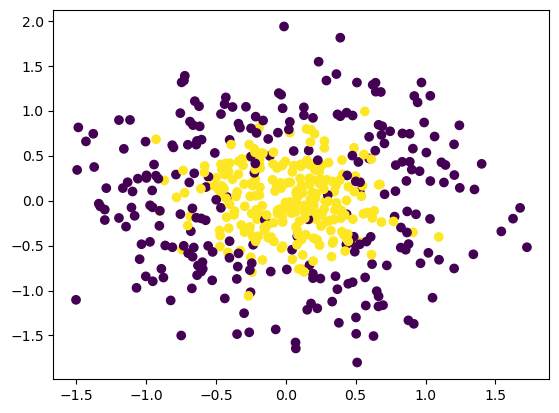

In [93]:
plt.scatter(X[:,0],X[:,1], c = y)

In [94]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import cross_val_score

In [95]:
abc = AdaBoostClassifier()

In [96]:
np.mean(cross_val_score(abc, X,y, scoring="accuracy", cv = 10))

0.826

In [97]:
abc.fit(X,y)

AdaBoostClassifier()

<Axes: >

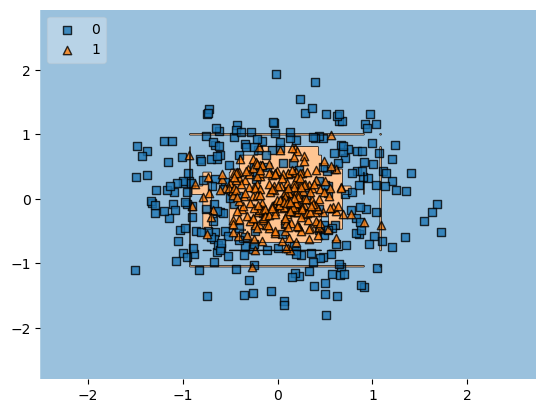

In [98]:
plot_decision_regions(X,y,clf = abc, legend=2)

In [113]:
def plot_decision_boundary(clf):
    

    plt.figure(figsize=(12, 8))
   
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

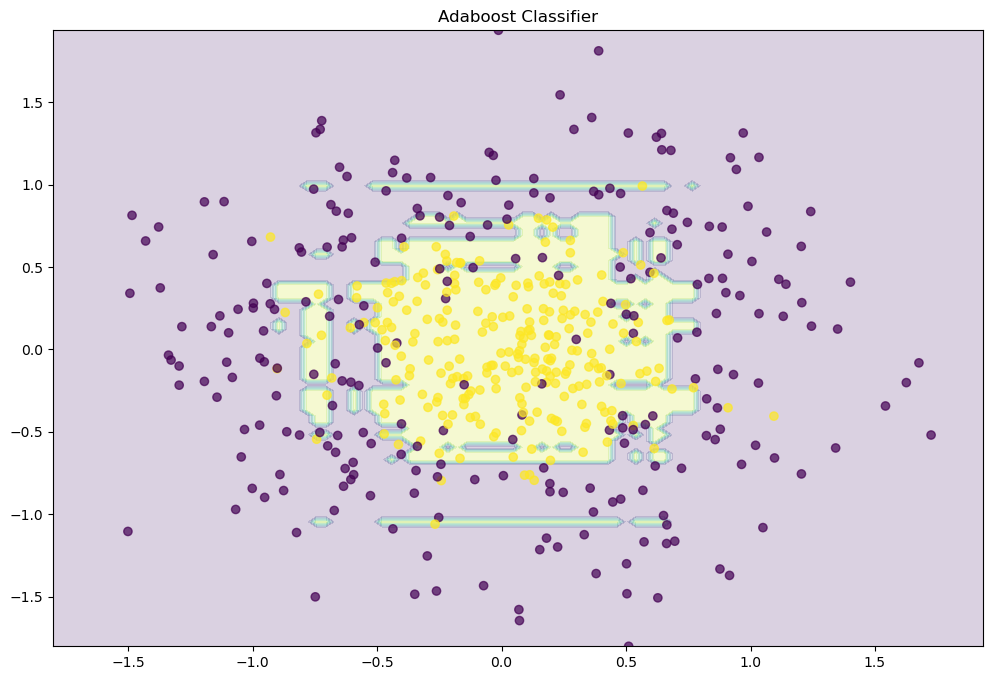

In [114]:
plot_decision_boundary(abc)

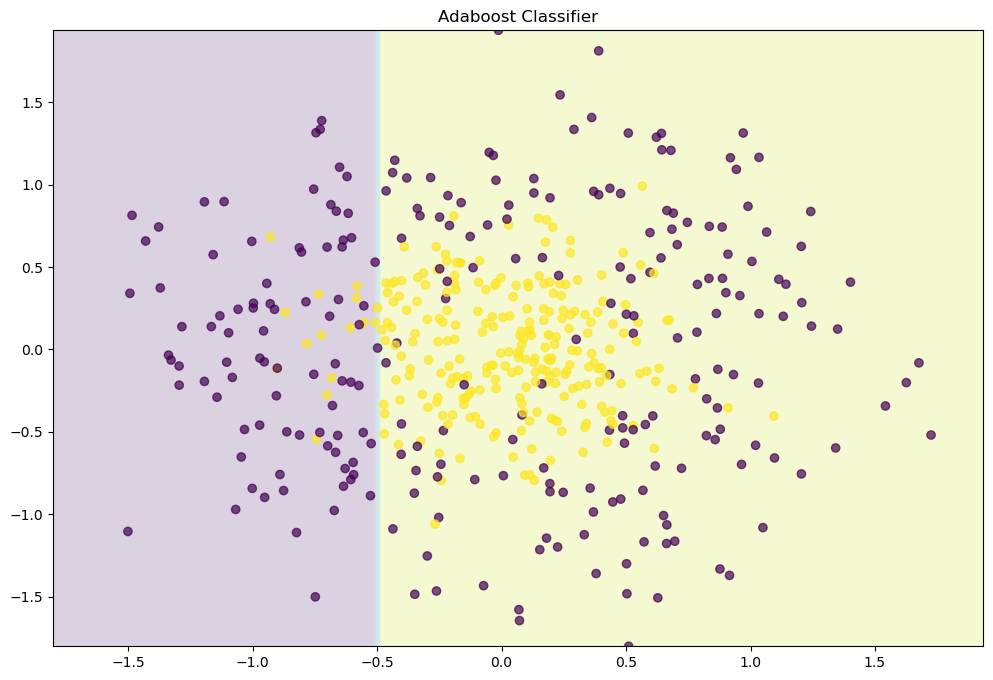

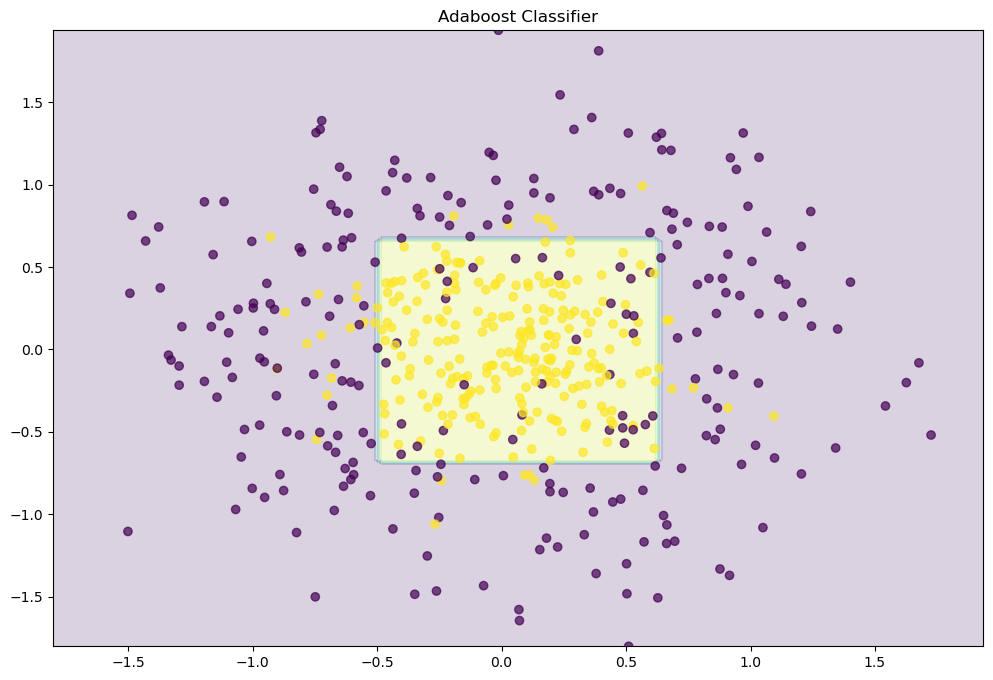

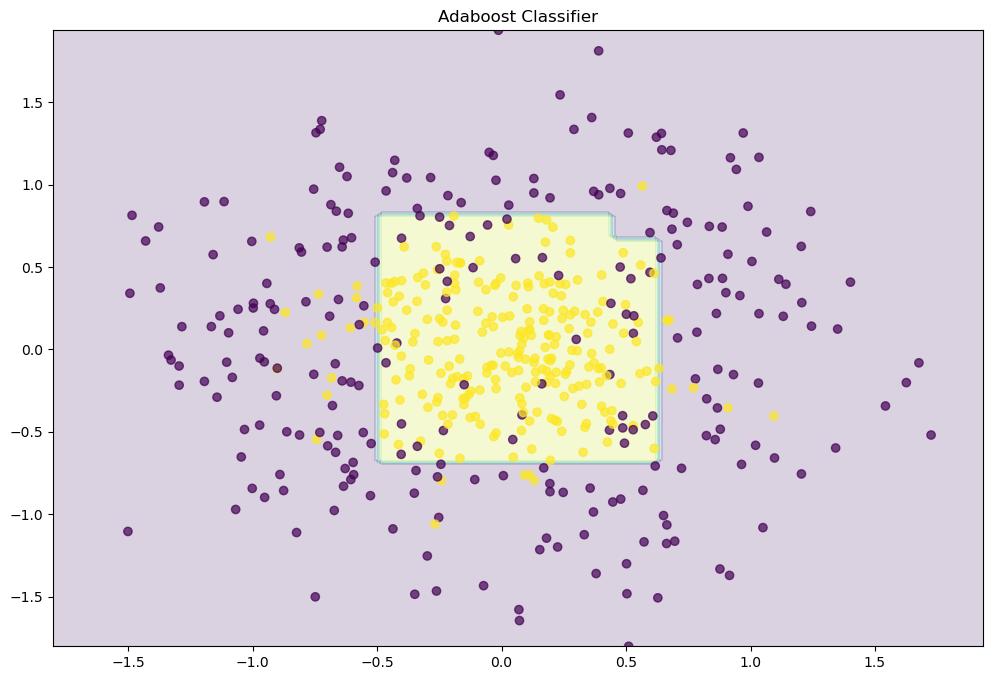

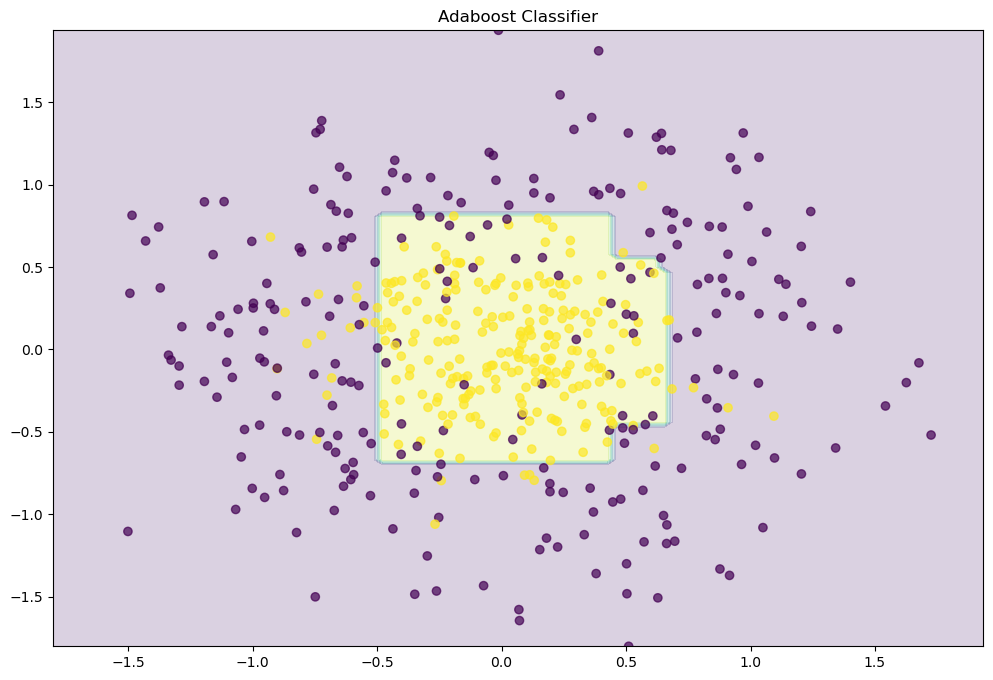

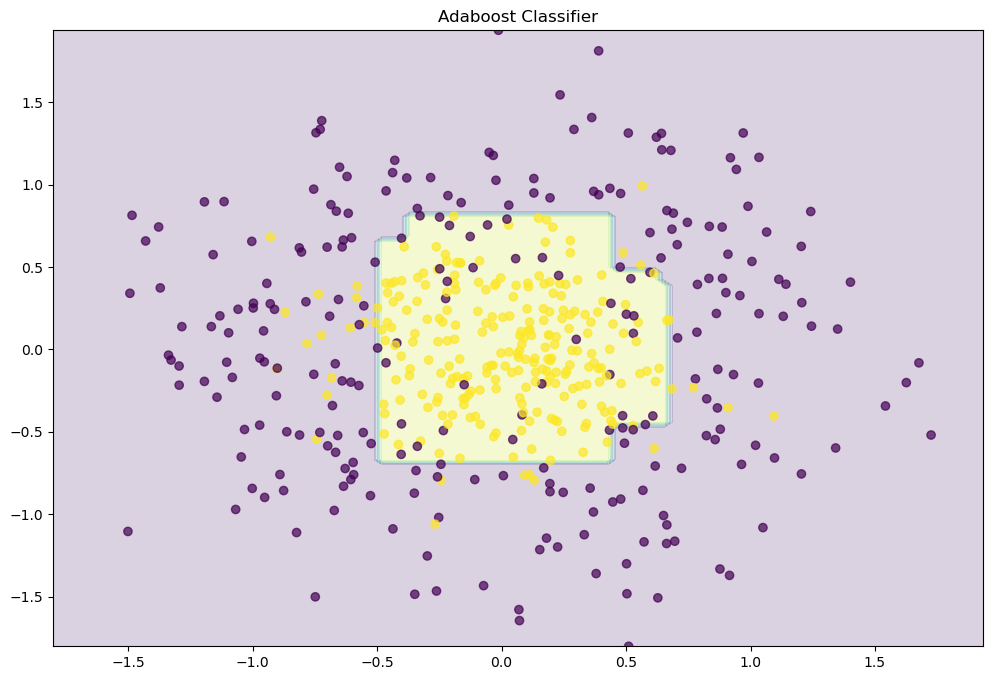

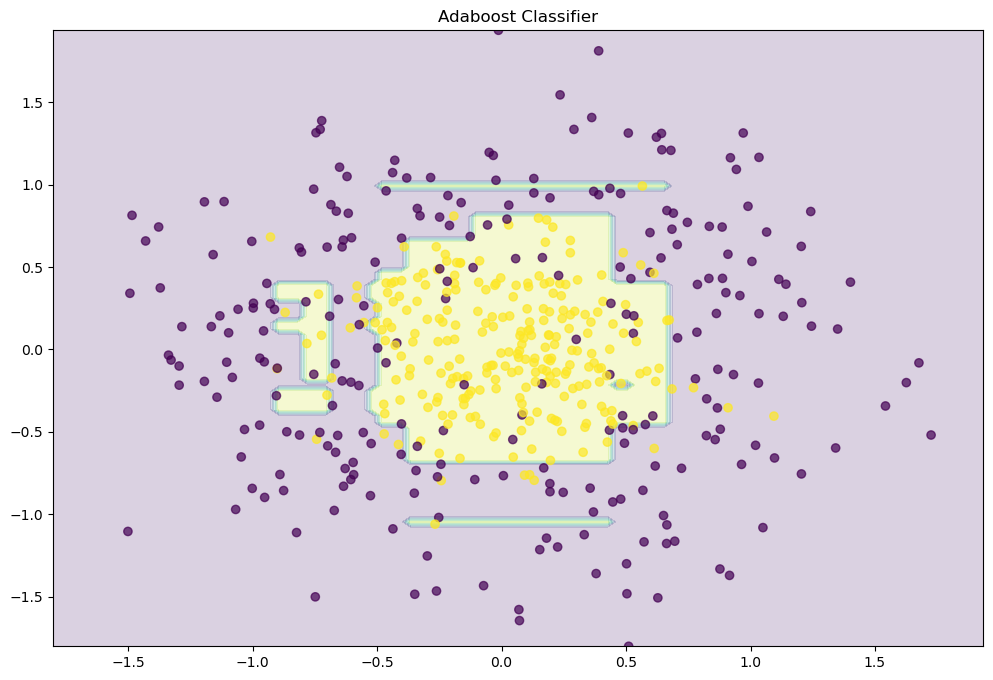

In [118]:
# increasing the number of n_estimators
for n in [1,50,100,500,1000,10000]:
    abc = AdaBoostClassifier(n_estimators=n, learning_rate=0.01)
    abc.fit(X,y)
    
    plot_decision_boundary(abc)
    plt.show()

In [116]:
# From above we can see that by increasing n_estimators that is increasing the number of tree, 
# model start from underfitting to balanced to overfitting

In [119]:
# Learning Rate - Reduce the amplitude of weights updation. SLow down learning by reducing overfitting

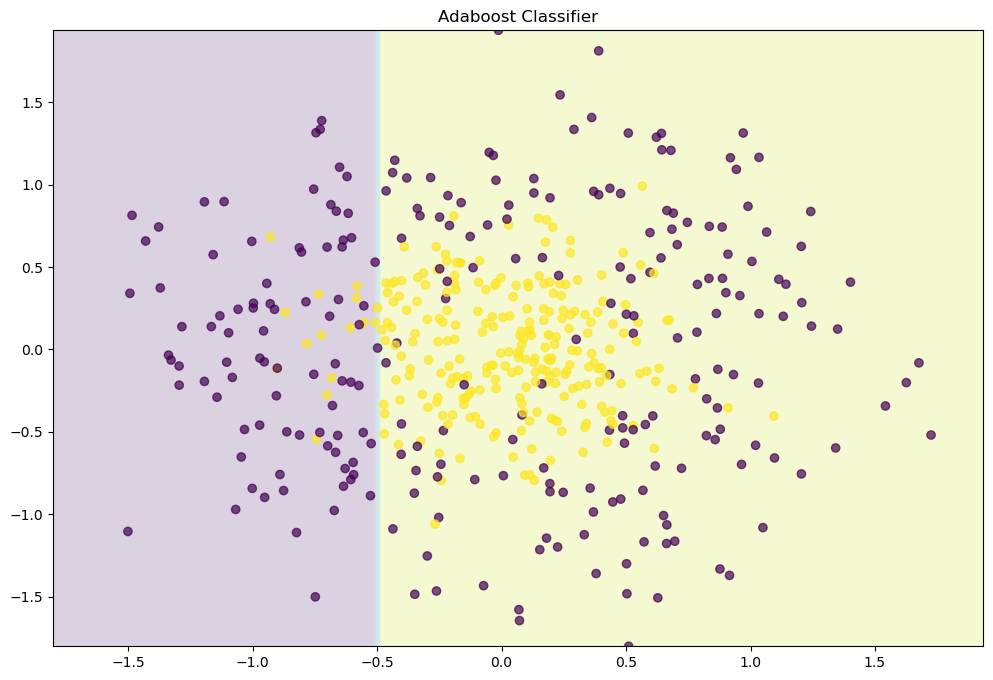

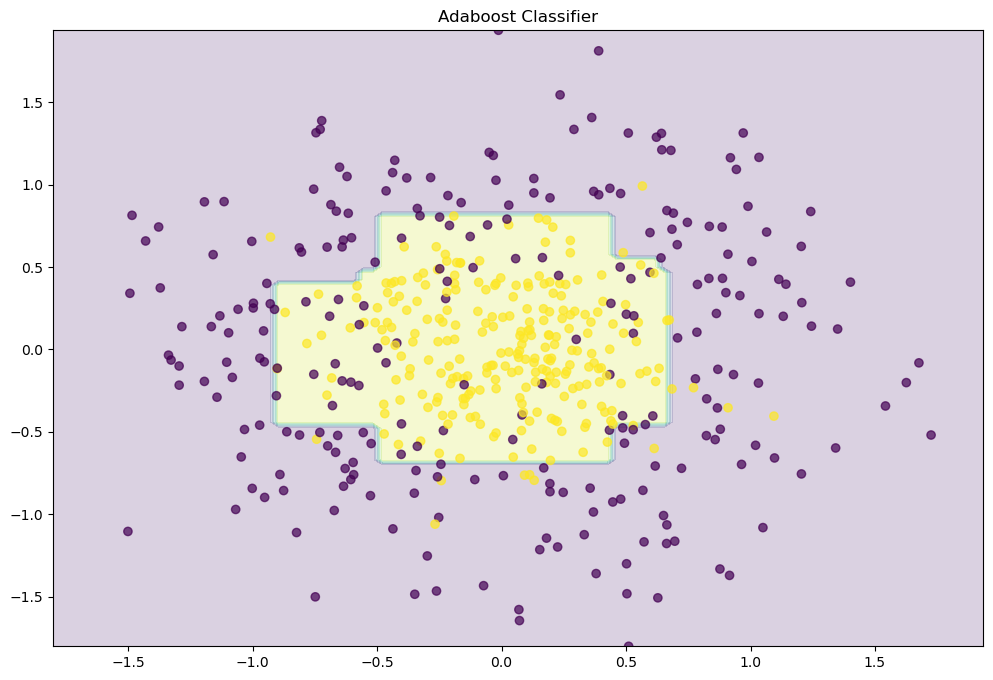

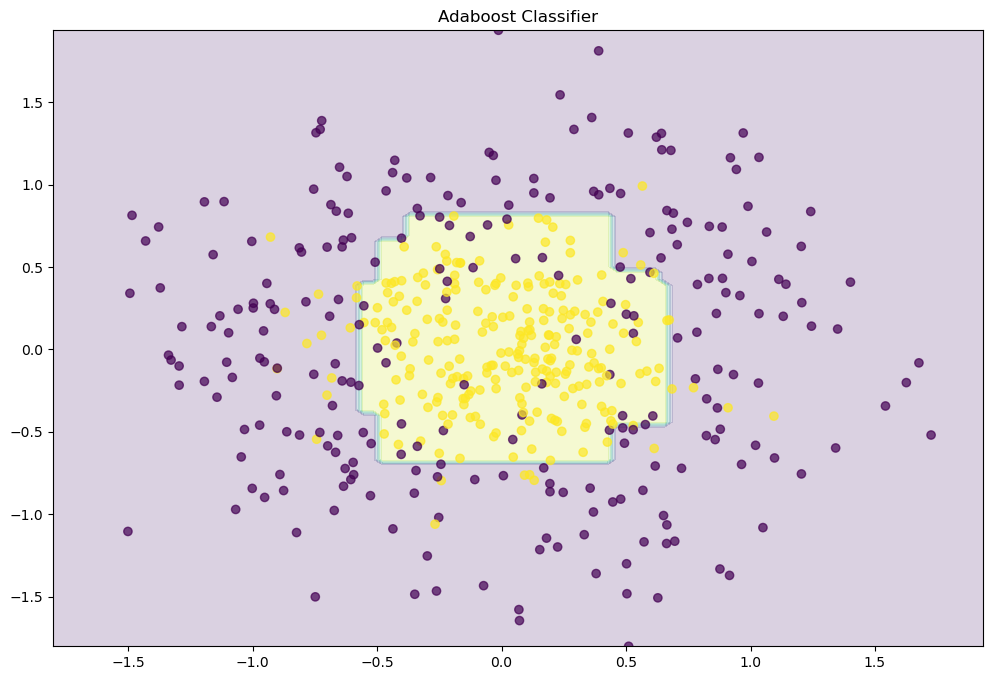

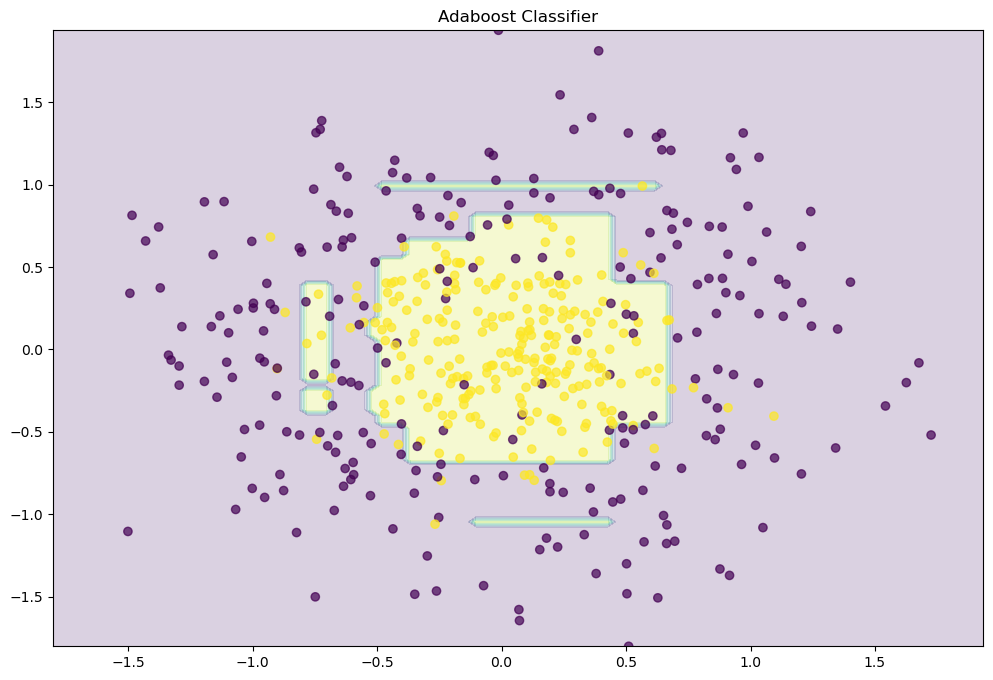

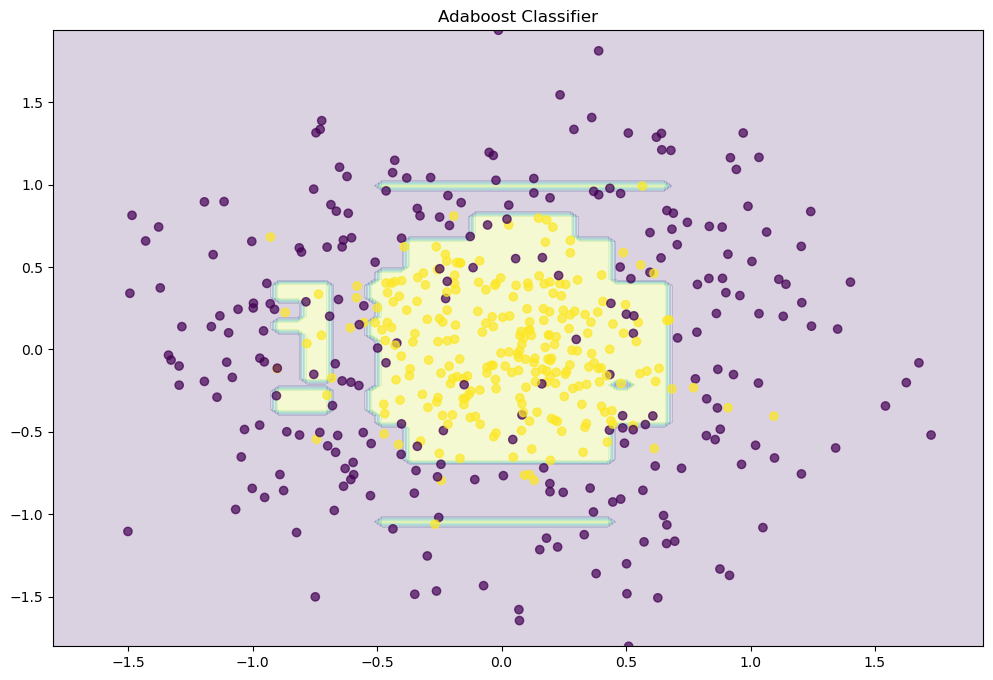

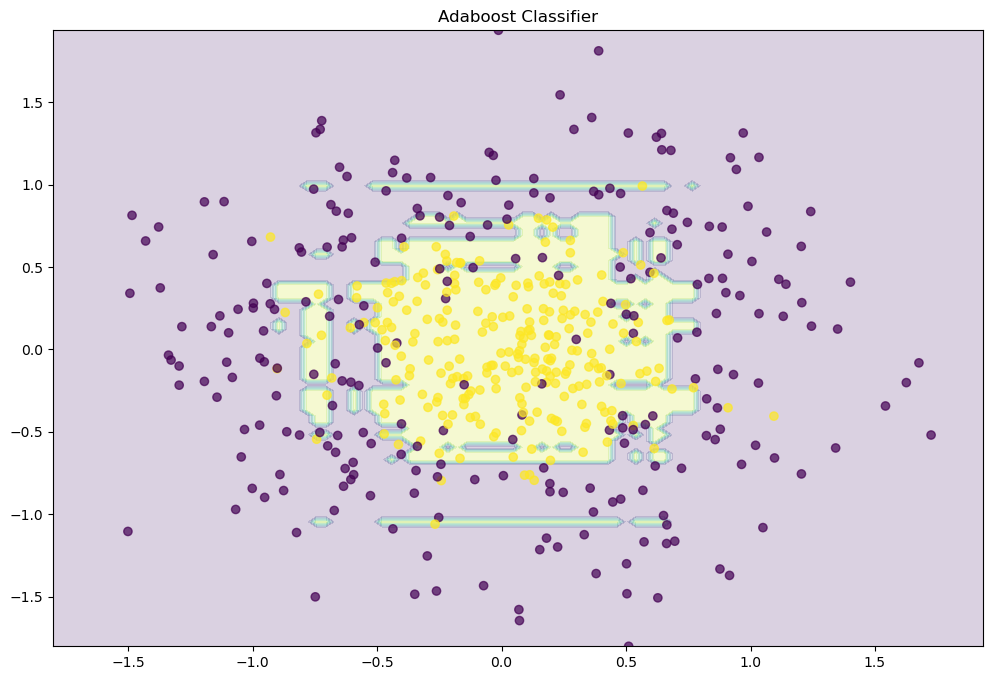

In [120]:
# increasing the number of n_estimators
for n in [1,50,100,500,1000,10000]:
    abc = AdaBoostClassifier(n_estimators=n, learning_rate=0.1)
    abc.fit(X,y)
    
    plot_decision_boundary(abc)
    plt.show()

# Applying GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
grid = dict()
grid["n_estimators"] = [10,50,100,500]
grid["learning_rate"] = [0.0001,0.001,0.01,0.1,1.0]
grid["algorithm"] = ["SAMME","SAMME.R"]

In [123]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                          param_grid=grid,
                          n_jobs = -1,
                          cv = 10, 
                          scoring="accuracy")

In [124]:
grid_result = grid_search.fit(X,y)

In [125]:
print("Best %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best 0.848000 using {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
